##Tipos de Variáveis

In [ ]:
import pandas as pd


In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
type(dados)

pandas.core.frame.DataFrame

Variáveis Qualitativas Ordinais


In [ ]:
dados['Anos de Estudo']

0        12
1        12
2        15
3         6
4         9
         ..
76835    11
76836     7
76837    12
76838     4
76839     4
Name: Anos de Estudo, Length: 76840, dtype: int64

In [ ]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Variáveis Qualitativas Nominais

In [ ]:
dados['Sexo']

0        0
1        1
2        1
3        0
4        1
        ..
76835    1
76836    0
76837    0
76838    0
76839    0
Name: Sexo, Length: 76840, dtype: int64

In [ ]:
sorted(dados['Sexo'].unique())

[0, 1]

Variáveis Quantitativa Discreta

In [ ]:
print('De %s até %s anos' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos


##Distribuição de Frequências Qualitativas

In [ ]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [ ]:
dados['Sexo'].value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [ ]:
frequencia = dados['Sexo'].value_counts()

In [ ]:
percentual = dados['Sexo'].value_counts(normalize = True) * 100


##Distribuição de frequência Qualitativas

In [ ]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [ ]:
dist_freq_qualitativas


,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [ ]:
# Renomeando os index
dist_freq_qualitativas.rename(index = { 0: 'Masculino', 1: 'Feminino'}, inplace = True)   

In [ ]:
# Renomeando o index
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace=True)  

In [ ]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


Método 2 para realizar o mesmo procedimento acima 

In [ ]:
sexo = {0: 'Masculino',
        1: 'Feminino'}
cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem Declaração'}

In [ ]:
frequencia = pd.crosstab(dados.Sexo,
                          dados.Cor)
frequencia.rename(index = sexo, inplace= True)
frequencia.rename(columns = cor, inplace= True)

In [ ]:
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
percentual = pd.crosstab(dados.Sexo,
                          dados.Cor,
                         normalize = True) * 100
percentual.rename(index = sexo, inplace= True)
percentual.rename(columns = cor, inplace= True)

In [ ]:
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


Renda média

In [ ]:
percentual = pd.crosstab(dados.Sexo,
                          dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace= True)
percentual.rename(columns = cor, inplace= True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


Distribuição de Frequências p/ variáveis quantitativas 

In [ ]:
dados.Renda.min()

0

In [ ]:
dados.Renda.max()

200000

Utilizar a seguinte classificação:

A ► Acima de 20 SM

B ► De 10 a 20 SM

C ► De 4 a 10 SM

D ► De 2 a 4 SM

E ► Até 2 SM

onde SM é o valor do salário mínimo na época. Em nosso caso R$ 788,00 (2015):

A ► Acima de 15.760

B ► De 7.880 a 15.760

C ► De 3.152 a 7.880

D ► De 1.576 a 3.152

E ► Até 1.576

In [ ]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [ ]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True), 
       normalize = True
)
percentual

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [ ]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [ ]:
#Ordenando pelas letras
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


Definindo o numero de classes , com formula para k. 

In [ ]:
import numpy as np

In [ ]:
n = dados.shape[0]
n

76840

In [ ]:
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

17

In [ ]:
#Criando tabelas de frequências 
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
        ),
        sort = False
)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [ ]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
        ),
        sort = False,
        normalize = True
)
percentual

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [ ]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


Visualizando a distribuição de frequência com histogramas

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


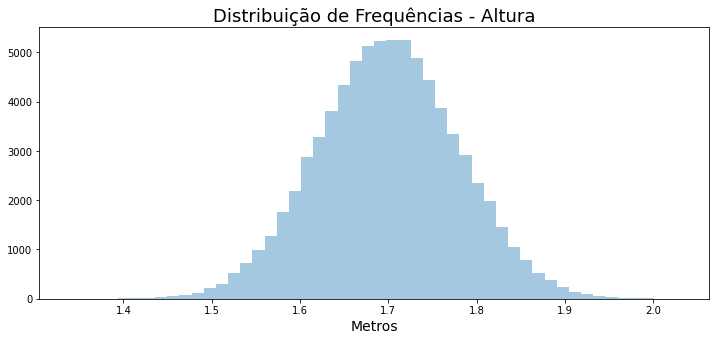

In [ ]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 5)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize= 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


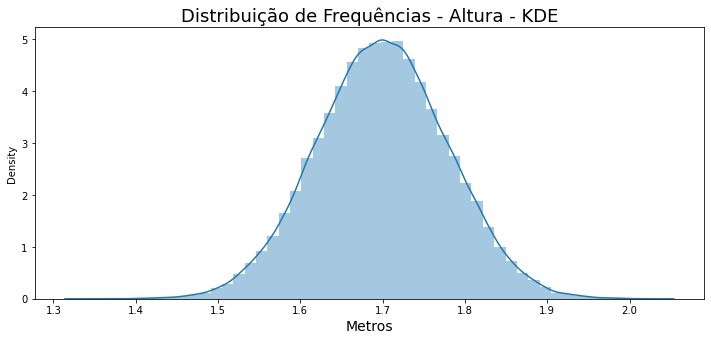

In [ ]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 5)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize = 18)
ax.set_xlabel('Metros', fontsize= 14)
ax

Usando o pandas

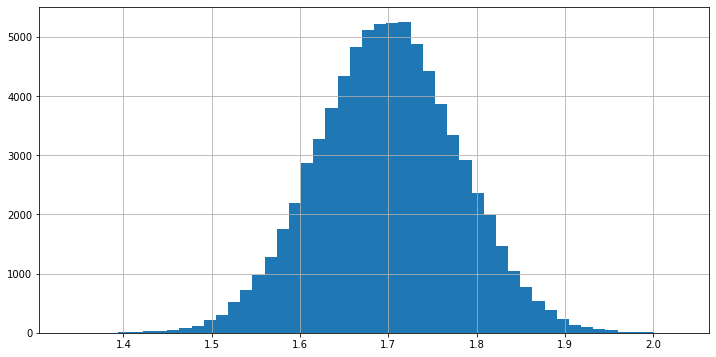

In [ ]:
dados.Altura.hist(bins = 50, figsize=(12,6))

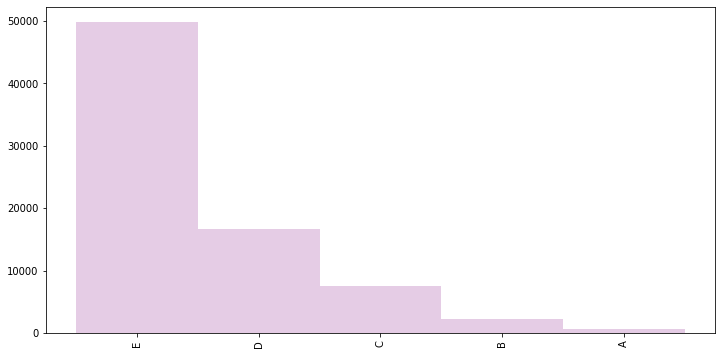

In [ ]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width = 1, color = 'purple', alpha = 0.2 , figsize=(12,6) )

## Medidas de tendência Central

In [ ]:
dados.Renda.mean()

2000.3831988547631

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
#renda média por sexo
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

Mediana

In [ ]:
dados.Renda.median()

1200.0

In [ ]:
dados.Renda.quantile()

1200.0

Moda

In [ ]:
dados.Renda.mode()

0    788
dtype: int64

Avaliando a variável renda

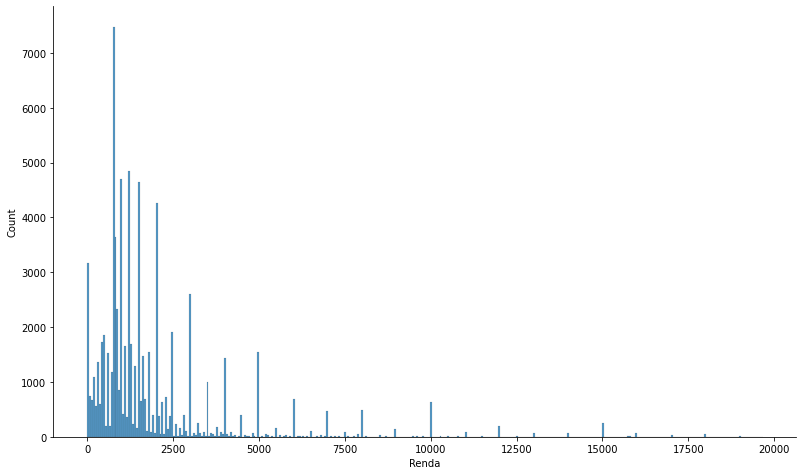

In [ ]:
ax = sns.displot(dados.query('Renda < 20000').Renda)
ax.fig.set_size_inches(13, 7)
ax

In [ ]:
Moda = dados.Renda.mode()[0]
Moda

788

In [ ]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [ ]:
Média = dados.Renda.mean()
Média

2000.3831988547631

### Medidas Separatrizes

Quartis, decis e percentis

In [ ]:
#quartis
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [ ]:
[i/10 for i in range(1, 10) ]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
#decis
dados.Renda.quantile([i/10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [ ]:
#percentis
dados.Renda.quantile([i/100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

##Box-Plot

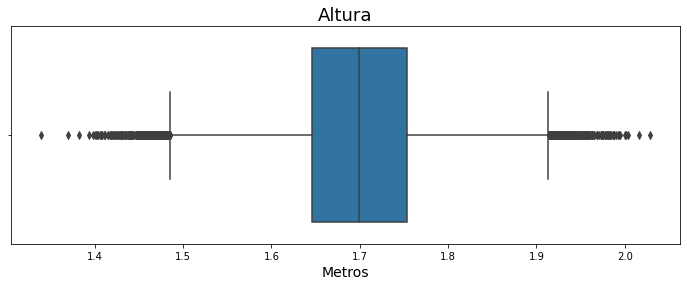

In [ ]:
ax = sns.boxplot( x = 'Altura', data = dados, orient ='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

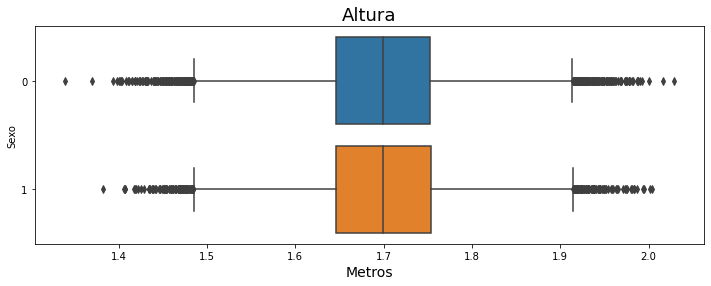

In [ ]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient ='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

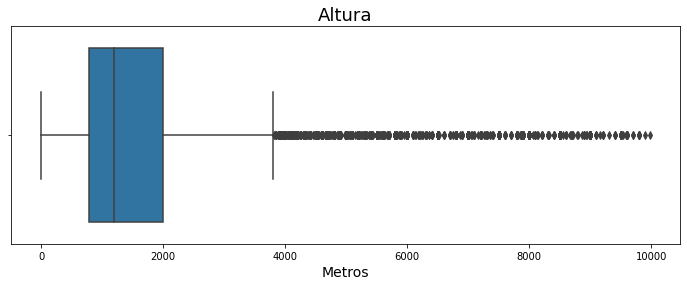

In [ ]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient ='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

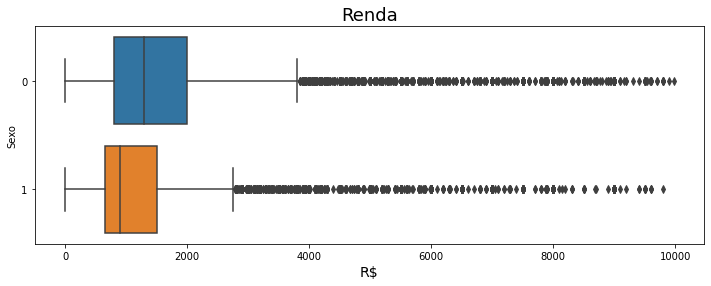

In [ ]:
ax = sns.boxplot( x = 'Renda', y='Sexo', data = dados.query('Renda < 10000'), orient ='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

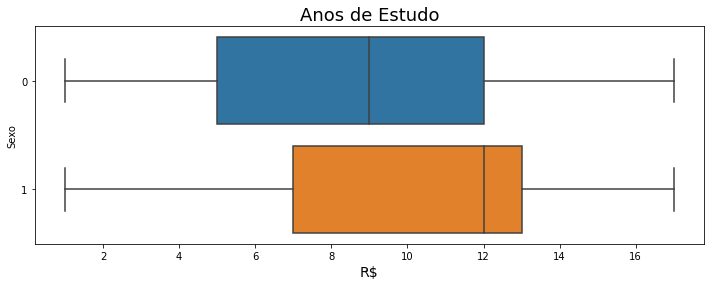

In [ ]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data=dados, orient ='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

##Medidas de Dispersão

Desvio médio absoluto -> fórmula = mad()

In [ ]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


In [ ]:
df.mad()

Matérias
Fulano     1.551020
Sicrano    0.469388
dtype: float64

Variância 

In [ ]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [ ]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [ ]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [ ]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano


Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [ ]:
notas_fulano['(Desvio^2)'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio^2)
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [ ]:
notas_fulano['(Desvio^2)'].sum()/(len(notas_fulano)-1)

4.57142857142857

In [ ]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

##Desvio Padrão

In [ ]:
np.sqrt(variancia)

2.1380899352993947

In [ ]:
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947